In [20]:
import scipy.stats as sps
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline
from random import randrange
import math
import scipy


In [21]:
def draw_pl(pl,  xmin, xmax, ymax, grid_size, distr_name, **kwargs):
       
    grid = np.linspace(xmin, xmax, grid_size)  
    plt.figure(figsize=(12, 5))
    plt.plot(grid, pl(grid, **kwargs), lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=20)
    plt.show()
    

In [22]:
a = int(input("Введите левую координату")) 
b = int(input("Введите правую координату"))
n = 1000000
res = np.random.uniform(a, b, n)
res

Введите левую координату0
Введите правую координату5


array([3.68543888, 1.93525307, 4.878261  , ..., 0.53232022, 0.90534929,
       0.33594377])

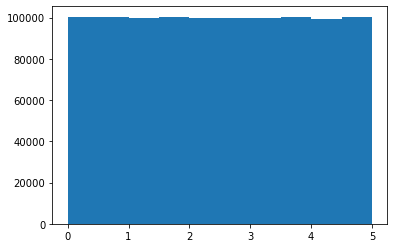

In [4]:
plt.hist(res)
plt.show()

In [23]:
import random #метод обратных функций
def random_values_generator(a, b, n): 
    res = []
    for i in range(1, n):
        value = (b - a) * random.random() + a
        res.append(value)
    return res

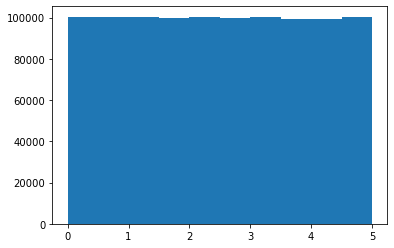

In [24]:
n = 1000000

res = random_values_generator(a, b, n)
plt.hist(res)
plt.show()

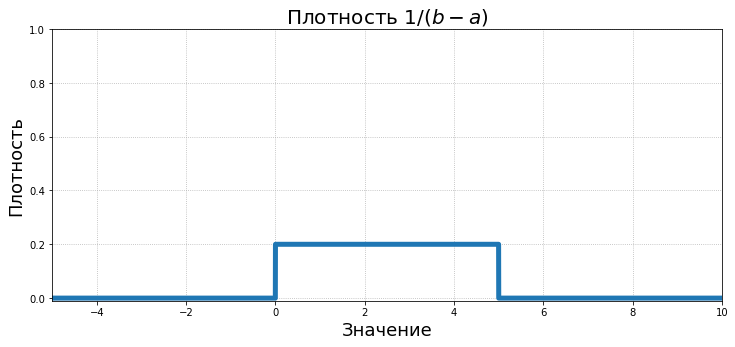

In [7]:
draw_pl(
    pl=sps.uniform.pdf, xmin=a - 5, xmax=b + 5, ymax=1, grid_size=10000, 
    distr_name=r'$ 1/(b-a)$', loc=a, scale=b
)

In [25]:
import math
MX = (a + b) / 2 # мат ожидание
DX = math.pow((b - a),2)/ 12 # дисперсия
Sigma = math.sqrt(DX) 
print(MX, DX, Sigma)

2.5 2.0833333333333335 1.4433756729740645


In [26]:
mMark = 0.0 #несмещенная оценка матожидания 
dMark = 0.0 #несмещенная оценка дисперсии
sigmaDM = 0
for i in res:
    mMark += i
mMark /= n

for i in res:
    dMark = dMark + math.pow((i - mMark), 2)
dMark = dMark / n

sigmaDM = math.sqrt(dMark)

print(mMark, dMark, sigmaDM)


2.497263276069744 2.0845873061446216 1.4438099965523932


In [27]:
# точечные оценки right, left
aPoint = mMark - math.sqrt(3) * sigmaDM
bPoint = mMark + math.sqrt(3) * sigmaDM
print(aPoint, bPoint)


-0.003488994434846404 4.998015546574335


In [28]:
# доверительный интервал right
mx=res[0]
for i in res:
    if i > mx: 
        mx = i

y = 0.90
e1 = (1 - y) / 2
e2 = e1

print('%s, %s'%(mx / (math.pow((1 - e2),1 / n)), mx / (math.pow(e1, 1/n)  ) ))

4.999996285056076, 5.000011007261707


In [29]:
a = 0.95 #уровень значимости
k = 9 
#найдем предполагаемую плотность
f = 1 / (bPoint - aPoint)
print(f)



    



0.19993983646333438


In [30]:
from scipy import stats

print(stats.chi2.ppf(0.95, n - 3))

1002324.3072919542


In [31]:
res.sort()

In [32]:
# прооверка гипотезы (нахождение хи-квадрат эмпирического и теор)
xhi = 0
sm = 0
for i, val in enumerate(res):
    if i + 1 >= len(res): break
    n_i = n * f * (res[i + 1] - res[i])
    sm += n_i
    xhi = xhi + (n_i - round(n_i)) * (n_i - round(n_i)) / n_i
#print(xhi, sm/n)
print(xhi < stats.chi2.ppf(0.95, n - 3))

True
